# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html,'html.parser')

In [5]:
# Find the table
table = soup.find('table', class_="table")
print(table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [6]:
# Extract all rows of data
rows = soup.find_all('tr', class_="data-row")
print(rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
mars_weather = []

# Loop through the scraped data to create a list of dictionaries
for row in rows:
    data_elements = row.find_all('td')  # Find all the 'td' elements within the row
    if data_elements:
        # Extract the data from the 'td' elements and store it in a dictionary
        id = data_elements[0].text
        terrestrial_date = data_elements[1].text
        sol = data_elements[2].text
        ls = data_elements[3].text
        month = data_elements[4].text
        min_temp = data_elements[5].text
        pressure = data_elements[6].text

        # Create a dictionary to store the extracted data
        row_data = {
            "id": id,
            "terrestrial_date": terrestrial_date,
            "sol": sol,
            "ls": ls,
            "month": month,
            "min_temp": min_temp,
            "pressure": pressure
        }

        # Append the dictionary to the list
        mars_weather.append(row_data)

# Print the list of dictionaries
print(mars_weather)


[{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}, {'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}, {'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}, {'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}, {'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'mi

In [8]:
 #Create a DataFrame from the list of dictionaries
mars_weather_df = pd.DataFrame(mars_weather)

# Now, mars_weather_df contains your data as a DataFrame
print(mars_weather_df)


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [9]:
mars_weather_df.head()

id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
data_types = mars_weather_df.dtypes

# Print the data types of each column
print(data_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
mars_weather_df['id'] = mars_weather_df['id'].astype(int)
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])  
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int) 
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)  
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)  

In [12]:
# Confirm type changes were successful by examining data types again
data_types = mars_weather_df.dtypes

print(data_types)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
unique_months = mars_weather_df['month'].nunique()

print("Number of unique months on Mars:", unique_months)

Number of unique months on Mars: 12


In [14]:
# 2. How many Martian days' worth of data are there?
unique_sol_values = mars_weather_df['sol'].nunique()

print("Number of Martian days' worth of data:", unique_sol_values)

Number of Martian days' worth of data: 1867


In [15]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

print(average_low_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


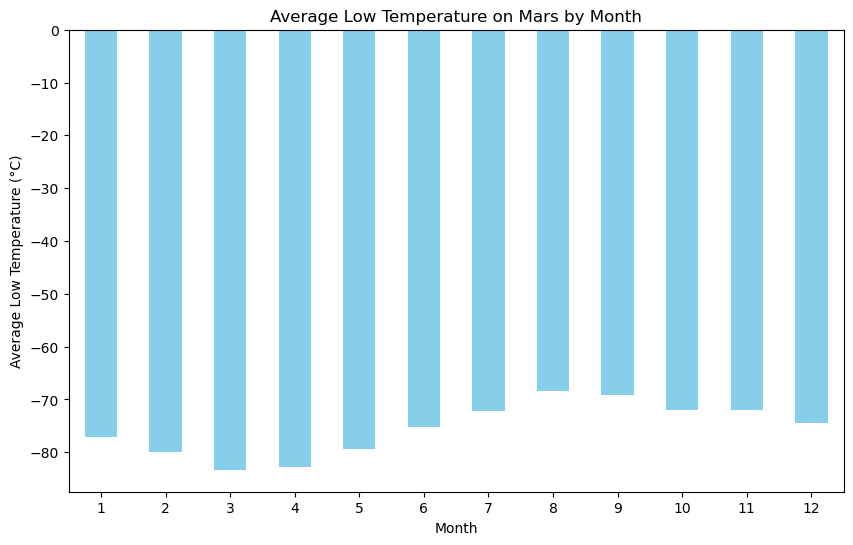

In [16]:
# Plot the average temperature by month
# Group the data by the "month" column and calculate the mean of "min_temp"
average_low_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Low Temperature on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()


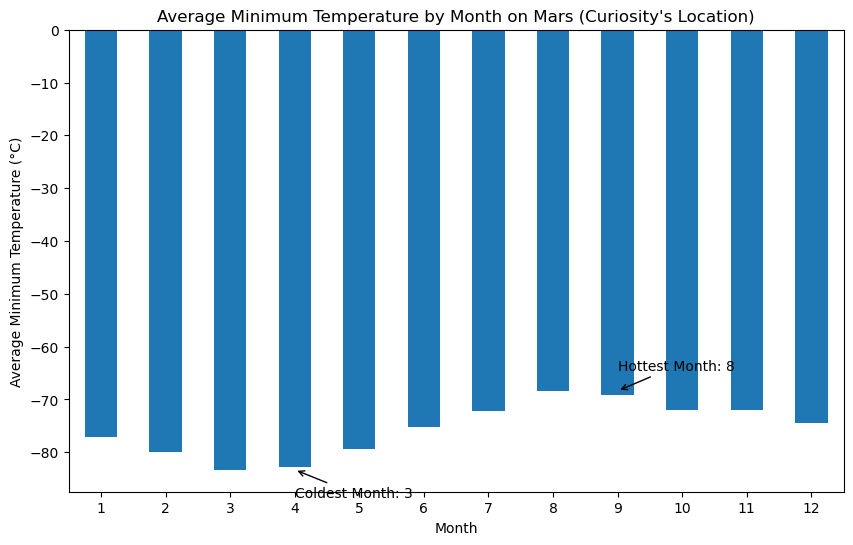

In [17]:
# Identify the coldest and hottest months in Curiosity's location
# Group the data by month and calculate the mean minimum temperature for each month
monthly_avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = monthly_avg_min_temp.idxmin()
hottest_month = monthly_avg_min_temp.idxmax()

# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_avg_min_temp.plot(kind='bar')
plt.title("Average Minimum Temperature by Month on Mars (Curiosity's Location)")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")

# Annotate the coldest and hottest months
plt.annotate(f'Coldest Month: {coldest_month}', xy=(coldest_month, monthly_avg_min_temp[coldest_month]), xytext=(0, -20),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(f'Hottest Month: {hottest_month}', xy=(hottest_month, monthly_avg_min_temp[hottest_month]), xytext=(0, 15),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.xticks(rotation=0)
plt.show()

In [18]:
# 4. Average pressure by Martian month
monthly_avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()

# Print the result
print(monthly_avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


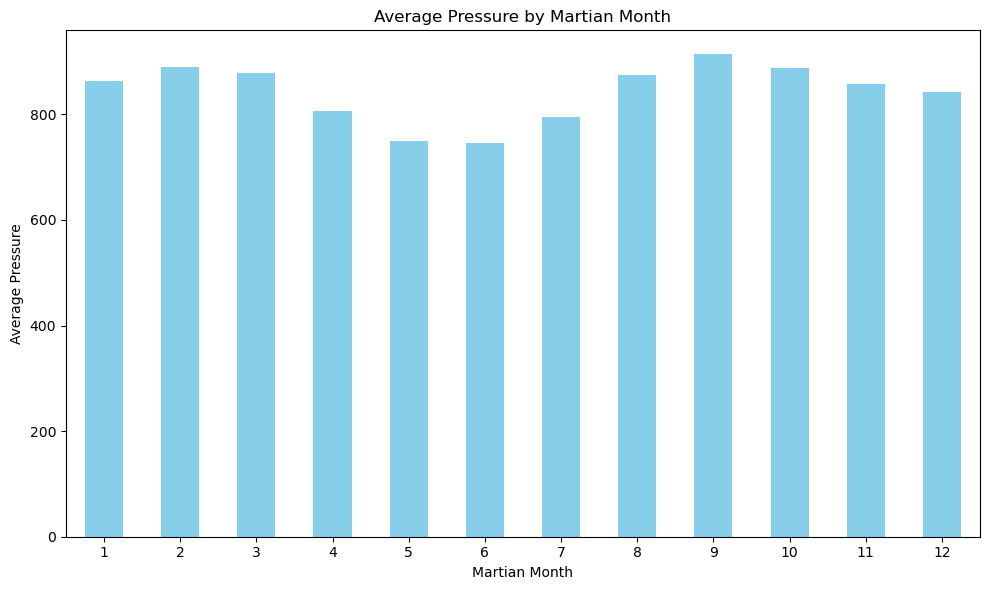

In [19]:
# Plot the average pressure by month
# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_avg_pressure.plot(kind='bar', color='skyblue')
plt.xlabel("Martian Month")
plt.ylabel("Average Pressure")
plt.title("Average Pressure by Martian Month")
plt.xticks(rotation=0)  # Rotate the x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

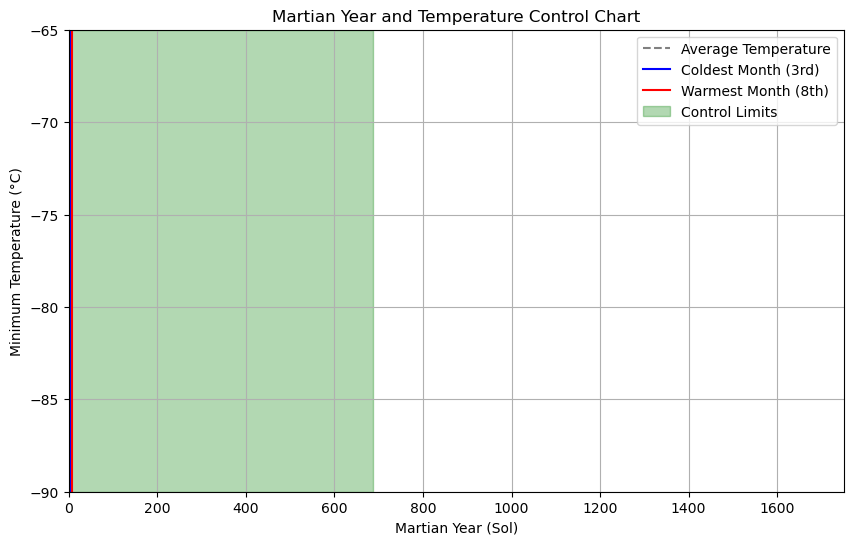

In [25]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Data
martian_year = 687  
coldest_month = 3
warmest_month = 8

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot([0, martian_year], [0, 0], linestyle='--', color='gray', label='Average Temperature')
plt.plot([coldest_month, coldest_month], [-100, 0], color='blue', label='Coldest Month (3rd)')
plt.plot([warmest_month, warmest_month], [-100, 0], color='red', label='Warmest Month (8th)')

# Add shaded region for control limits
control_limit_low = -90 
control_limit_high = -65  
plt.fill_between([0, martian_year], control_limit_low, control_limit_high, color='green', alpha=0.3, label='Control Limits')

# Set x-axis and y-axis limits
plt.xlim(0, 1750)  # Adjusted x-axis limits
plt.ylim(-90, -65)  # Adjusted y-axis limits

# Add labels and legend
plt.title('Martian Year and Temperature Control Chart')
plt.xlabel('Martian Year (Sol)')
plt.ylabel('Minimum Temperature (°C)')
plt.legend()

plt.grid(True)
plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
csv_file_path = 'mars_weather_data.csv'

# Write the DataFrame to a CSV file
mars_weather_df.to_csv(csv_file_path, index=False)

print(r'Data has been written to "C:\Class Folder\Weekly Challenges\Week11\Starter_Code"')

Data has been written to "C:\Class Folder\Weekly Challenges\Week11\Starter_Code"


In [28]:
browser.quit()